#### Extracting Dataset using Kaggle API

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api 
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:30<00:00, 32.8MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.2MB/s]


#### Extracting the compressed dataset

In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


#### Importing the modules

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

import matplotlib.pyplot as plt
import cv2

#### Image data loading

In [ ]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#### Normalize the data

In [ ]:
# Normalize

def process(image,label):
  image = tensorflow.cast(image/255,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [ ]:
train_ds

#### Building a CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

#### Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

#### Compiling the Model

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#### Training the Model

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 66s 97ms/step - loss: 0.5957 - accuracy: 0.6746 - val_loss: 0.4782 - val_accuracy: 0.7732
Epoch 2/10
625/625 [==============================] - 58s 93ms/step - loss: 0.4407 - accuracy: 0.7901 - val_loss: 0.4392 - val_accuracy: 0.8000
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3261 - accuracy: 0.8568 - val_loss: 0.4842 - val_accuracy: 0.8094
Epoch 4/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1945 - accuracy: 0.9226 - val_loss: 0.6021 - val_accuracy: 0.8036
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1079 - accuracy: 0.9596 - val_loss: 0.7859 - val_accuracy: 0.8090
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.0745 - accuracy: 0.9736 - val_loss: 0.9750 - val_accuracy: 0.7960
Epoch 7/10
625/625 [==============================] - 58s 91ms/step - loss: 0.0521 - accuracy: 0.9825 - val_loss: 1.0373 - val_accuracy

#### Accuracy vs Val_accuracy

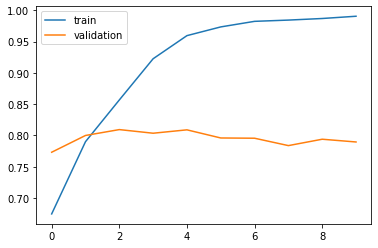

In [ ]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="validation")
plt.legend()

#### Loss vs Val_loss

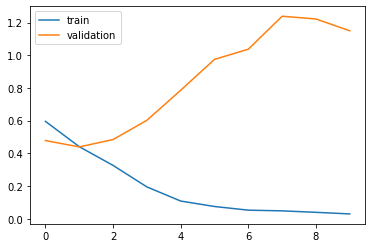

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()

#### Building another CNN model 

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 70s 111ms/step - loss: 1.1637 - accuracy: 0.6107 - val_loss: 0.5791 - val_accuracy: 0.6980
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5467 - accuracy: 0.7289 - val_loss: 0.5285 - val_accuracy: 0.7450
Epoch 3/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4558 - accuracy: 0.7861 - val_loss: 0.6034 - val_accuracy: 0.7292
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4019 - accuracy: 0.8196 - val_loss: 0.4360 - val_accuracy: 0.8146
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3240 - accuracy: 0.8607 - val_loss: 0.4803 - val_accuracy: 0.7690
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2573 - accuracy: 0.8909 - val_loss: 0.7258 - val_accuracy: 0.7770
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1810 - accuracy: 0.9275 - val_loss: 0.5213 - val_ac

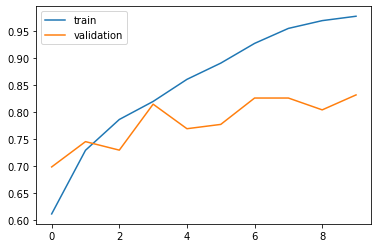

In [ ]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="validation")
plt.legend()

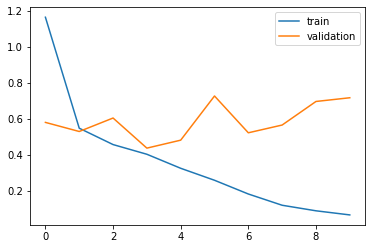

In [ ]:
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()

#### Performing prediction using model 

input = dog image

In [ ]:
test_img = cv2.imread("/content/dog.jpg")

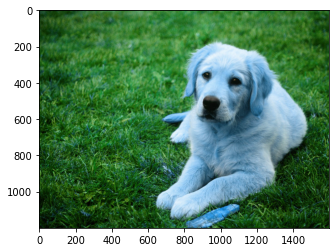

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1200, 1600, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

array([[1.]], dtype=float32)

input = cat image

In [ ]:
test_img = cv2.imread("/content/cat.jpg")

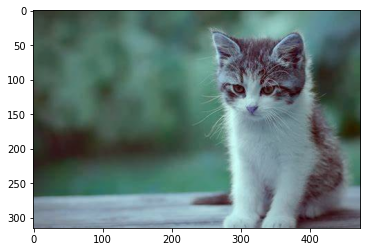

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(315, 474, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

array([[0.]], dtype=float32)